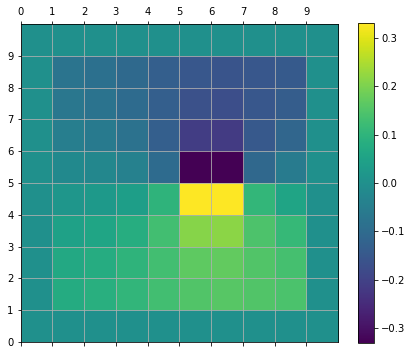

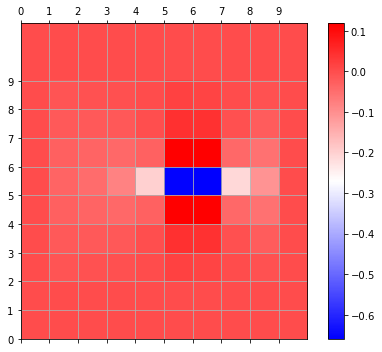

In [143]:
import importlib
import mac
import utils
import pressure
import fluid

importlib.reload(mac)
importlib.reload(utils)
importlib.reload(pressure)
importlib.reload(fluid)

import numpy as np
from mac import MACArray
from pressure import Solver
from utils import Vec
from fluid import Fluid

r, c = 10, 10
fls = np.ones((r, c)) * -1
sls = np.ones((r, c)) * +1

fls[0, :] = fls[-1, :] = fls[:, 0] = fls[:, -1] = +1
sls[0, :] = sls[-1, :] = sls[:, 0] = sls[:, -1] = -1

# Create a basic field
off_u, off_v  = Vec(0., 0.5), Vec(0.5, 0.)

x, y = np.linspace(-1, 1, num = r + 1), np.linspace(-1, 1, num = c + 1)
X, Y = np.meshgrid(x, y)
# U =  Y[:-1, :]
V = -X[:, :-1] * 0
U = np.zeros((r, c + 1))
V[5, 5:7] = 1

U = MACArray(U, off = off_u)
V = MACArray(V, off = off_v)

fls = MACArray(fls, off = Vec(0.5, 0.5))
sls = MACArray(sls, off = Vec(0.5, 0.5))


fluid = Fluid((r, c), fls, sls)
solver = Solver((r, c))

div = fluid.div([U, V], fls, 1)

solver.prepare(fls, sls, 1)
# solver.precondition(fls)
p, info = solver(div)

fluid.project(p, fls, sls)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 5))
# img = ax.matshow(solver.A.toarray(), aspect = 'auto', extent = (0, 25, 0, 25))
# img = ax.matshow(div, extent = (0, c, 0, r))
img = ax.matshow(p, extent = (0, c, 0, r))
ax.set_xticks(np.arange(r))
ax.set_yticks(np.arange(c))
ax.grid()

fig.colorbar(img)
fig.tight_layout()

fig, ax = plt.subplots(figsize = (6, 5))
img = ax.matshow(fluid.V, cmap = 'bwr', extent = (0, c, 0, r + 1))

# ax.set_ylim([24, 0])
ax.set_xticks(np.arange(r))
ax.set_yticks(np.arange(c))
ax.grid()

fig.colorbar(img)
fig.tight_layout()